## Prepare Environment

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

## About Dataset

This dataset is a synthetic but realistic collection of 32,424 individual financial records, representing real-world personal finance behaviors across income groups, regions, and loan statuses. It is ideal for EDA, financial modeling, credit risk prediction, and machine learning tasks.

- The data includes attributes like:

- Demographics (age, gender, education, employment status)

- Financial indicators (monthly income, expenses, savings)

- Loan-related details (loan type, amount, term, EMI, interest rate)

- Credit score & ratios (DTI, savings-to-income)

- Timestamps and regions

Each row represents a unique individual from one of several global regions, with varying income levels and loan behaviors. The dataset was generated using statistical distributions and realistic assumptions to mirror global financial trends.

In [2]:
!unzip personal_finance.zip

Archive:  personal_finance.zip
  inflating: synthetic_personal_finance_dataset.csv  


In [21]:
df = pd.read_csv('/content/synthetic_personal_finance_dataset.csv')
print(df.shape)
print(df.info())
df.head(5)

(32424, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32424 entries, 0 to 32423
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  32424 non-null  object 
 1   age                      32424 non-null  int64  
 2   gender                   32424 non-null  object 
 3   education_level          32424 non-null  object 
 4   employment_status        32424 non-null  object 
 5   job_title                32424 non-null  object 
 6   monthly_income_usd       32424 non-null  float64
 7   monthly_expenses_usd     32424 non-null  float64
 8   savings_usd              32424 non-null  float64
 9   has_loan                 32424 non-null  object 
 10  loan_type                12995 non-null  object 
 11  loan_amount_usd          32424 non-null  float64
 12  loan_term_months         32424 non-null  int64  
 13  monthly_emi_usd          32424 non-null  float64
 14  loan_inter

,user_id,age,gender,education_level,employment_status,job_title,monthly_income_usd,monthly_expenses_usd,savings_usd,has_loan,loan_type,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,credit_score,savings_to_income_ratio,region,record_date
0,U00001,56,Female,High School,Self-employed,Salesperson,3531.69,1182.59,367655.03,No,NaN,0.00,0,0.00,0.00,0.00,430,8.68,Other,2024-01-09
1,U00002,19,Female,PhD,Employed,Salesperson,3531.73,2367.99,260869.10,Yes,Education,146323.34,36,4953.50,13.33,1.40,543,6.16,North America,2022-02-13
2,U00003,20,Female,Master,Employed,Teacher,2799.49,1003.91,230921.21,No,NaN,0.00,0,0.00,0.00,0.00,754,6.87,Africa,2022-05-12
3,U00004,25,Male,PhD,Employed,Manager,5894.88,4440.12,304815.51,Yes,Business,93242.37,24,4926.57,23.93,0.84,461,4.31,Europe,2023-10-02
4,U00005,53,Female,PhD,Employed,Student,5128.93,4137.61,461509.48,No,NaN,0.00,0,0.00,0.00,0.00,516,7.50,Africa,2021-08-07


In [8]:
# Lets investigate for missing values
df.isna().sum()

,0
user_id,0
age,0
gender,0
education_level,0
employment_status,0
job_title,0
monthly_income_usd,0
monthly_expenses_usd,0
savings_usd,0
has_loan,0


In [9]:
#The column with loan type contains a large number of missing values
#Lets see how many types of loans we have
df['loan_type'].value_counts()

,count
loan_type,
Home,3284
Education,3275
Business,3261
Car,3175


Missing Values: The loan_type column has a significant number of missing values (19,429). This suggests that many individuals in the dataset do not have a loan, which is consistent with the has_loan column indicating 'No' for those entries.

Loan Type Distribution: Among those who do have loans, the distribution across the four types (Home, Education, Business, Car) is fairly even.

## Exploratory Data Analysis

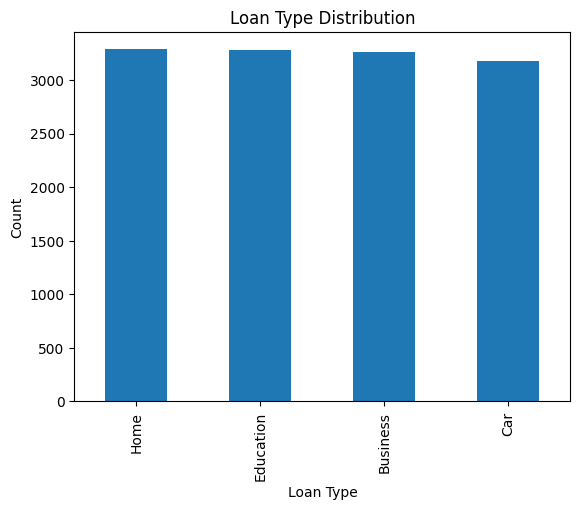

In [10]:
#lets visualize the loan types
df['loan_type'].value_counts().plot(kind='bar')
plt.title('Loan Type Distribution')
plt.xlabel('Loan Type')
plt.ylabel('Count')
plt.show()

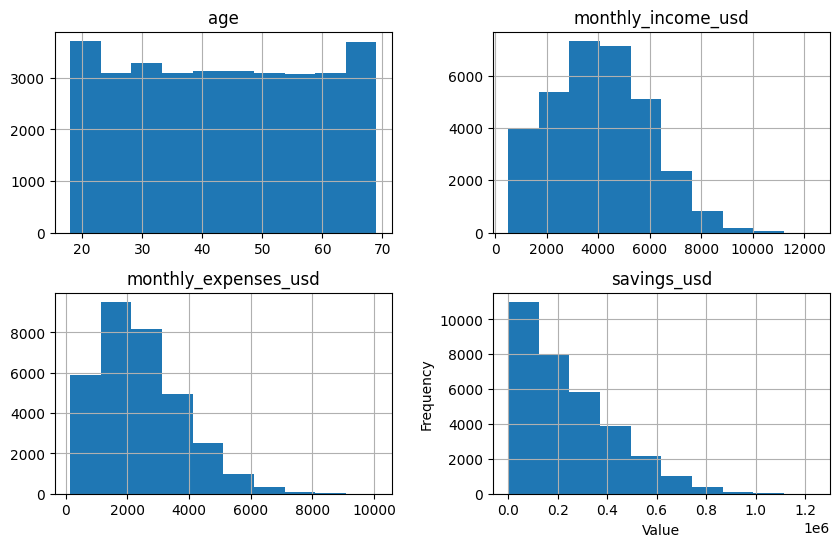

In [12]:
# Lets visualize for Age, monthly_income_usd, monthly_expenses_usd savings_usd
df[['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd']].describe()
df[['age', 'monthly_income_usd', 'monthly_expenses_usd', 'savings_usd']].hist(figsize=(10, 6))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Numerical Variable Distributions: The histograms for 'age', 'monthly_income_usd', 'monthly_expenses_usd', and 'savings_usd' show the spread of these values. We can see the typical ranges and identify if there are any unusual concentrations or outliers in the data for these financial metrics.

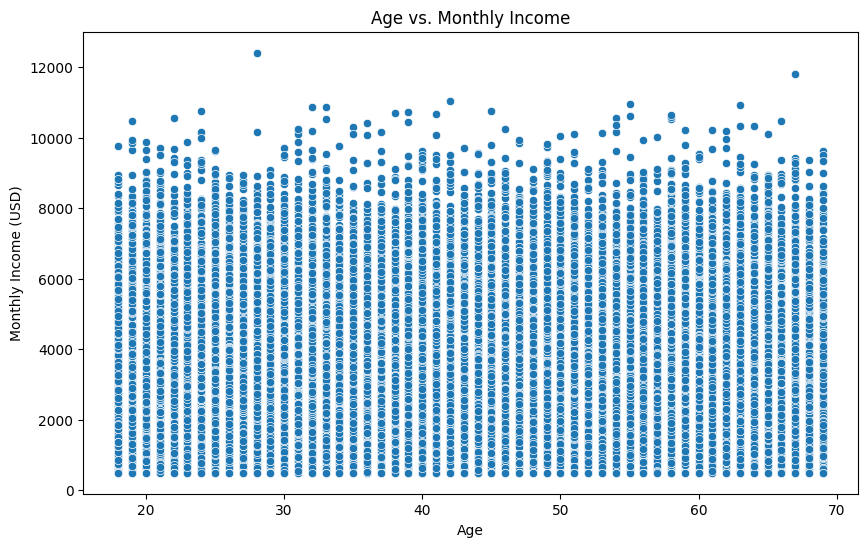

In [13]:
#lets visualize for age vs monthly income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='monthly_income_usd', data=df)
plt.title('Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income (USD)')
plt.show()

This demonstrates that monthly income is evenly distributed among all ages

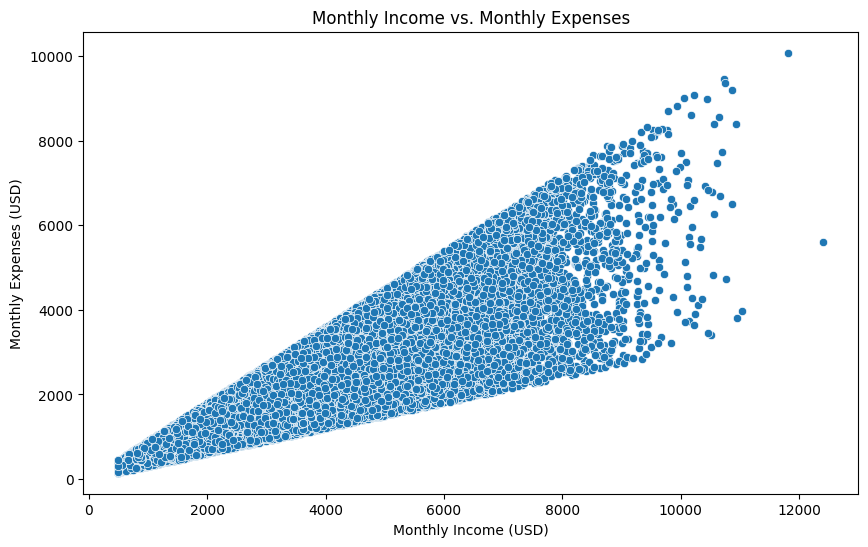

In [14]:
#Lets visualize monthly income and monthly expences using a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='monthly_income_usd', y='monthly_expenses_usd', data=df)
plt.title('Monthly Income vs. Monthly Expenses')
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Monthly Expenses (USD)')
plt.show()

In [15]:
df['monthly_income_usd'].corr(df['monthly_expenses_usd'])

np.float64(0.8291714502811789)

This demonstrates that monthly income is directly correlated wit the expences

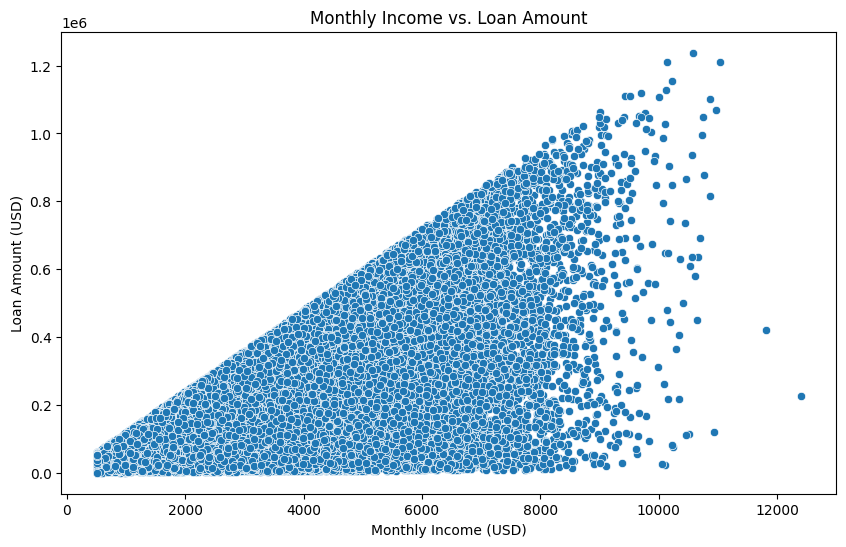

In [17]:
#Lets visualize monthly income vs loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='monthly_income_usd', y='savings_usd', data=df)
plt.title('Monthly Income vs. Loan Amount')
plt.xlabel('Monthly Income (USD)')
plt.ylabel('Loan Amount (USD)')
plt.show()

In [19]:
df['monthly_income_usd'].corr(df['savings_usd'])

np.float64(0.6038179711169477)

This demonstrates a correlation between the monthl;y income and expences

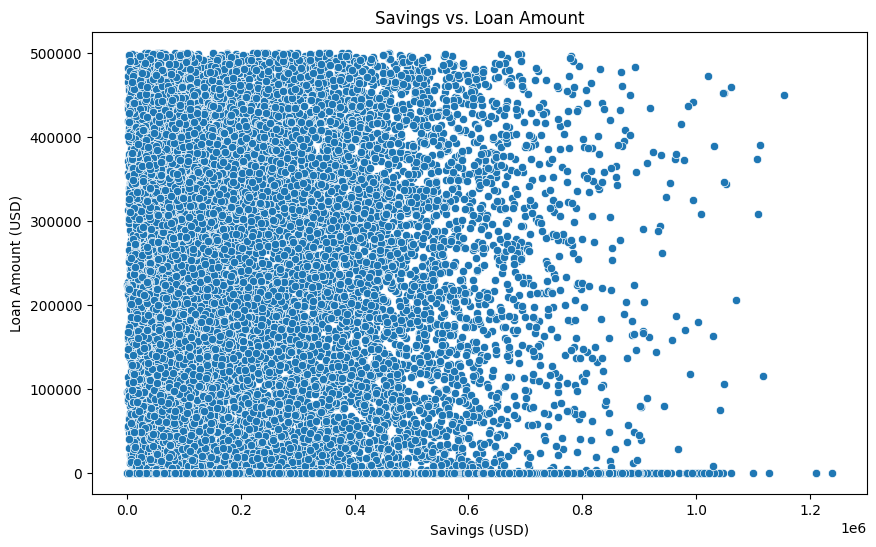

In [18]:
#Lets visualize savings_usd and loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='savings_usd', y='loan_amount_usd', data=df)
plt.title('Savings vs. Loan Amount')
plt.xlabel('Savings (USD)')
plt.ylabel('Loan Amount (USD)')
plt.show()

In [20]:
df['loan_amount_usd'].corr(df['savings_usd'])

np.float64(0.0019709818558678216)

This demonstrates a low correlation  between the savings and loan amount

Since we will be building a model to predict credict score lets transform the columns with categorical features, for this we will use one hote encoding then we will we will normalize our numerical features to a mean of o and standard deviation of 1

In [31]:
#lets check for columns with categorical fetures
df.select_dtypes(include='object').columns

Index(['user_id', 'gender', 'education_level', 'employment_status',
       'job_title', 'has_loan', 'loan_type', 'region', 'record_date'],
      dtype='object')

In [32]:
categorical_cols = df.select_dtypes(include='object').columns
# Exclude user_id and record_date as they are not relevant for one-hot encoding
categorical_cols = categorical_cols.drop(['user_id', 'record_date'])

df_encoded = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)
display(df_encoded.head())

,user_id,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,...,has_loan_Yes,loan_type_Business,loan_type_Car,loan_type_Education,loan_type_Home,region_Africa,region_Asia,region_Europe,region_North America,region_Other
0,U00001,56,3531.69,1182.59,367655.03,0.00,0,0.00,0.00,0.00,...,False,False,False,False,False,False,False,False,False,True
1,U00002,19,3531.73,2367.99,260869.10,146323.34,36,4953.50,13.33,1.40,...,True,False,False,True,False,False,False,False,True,False
2,U00003,20,2799.49,1003.91,230921.21,0.00,0,0.00,0.00,0.00,...,False,False,False,False,False,True,False,False,False,False
3,U00004,25,5894.88,4440.12,304815.51,93242.37,24,4926.57,23.93,0.84,...,True,True,False,False,False,False,False,True,False,False
4,U00005,53,5128.93,4137.61,461509.48,0.00,0,0.00,0.00,0.00,...,False,False,False,False,False,True,False,False,False,False


In [33]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize (excluding user_id and the target variable credit_score)
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('credit_score')
if 'user_id' in numerical_cols:
  numerical_cols.remove('user_id')

# Initialize the scaler
scaler = StandardScaler()

# Apply scaler to numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,user_id,age,monthly_income_usd,monthly_expenses_usd,savings_usd,loan_amount_usd,loan_term_months,monthly_emi_usd,loan_interest_rate_pct,debt_to_income_ratio,...,has_loan_Yes,loan_type_Business,loan_type_Car,loan_type_Education,loan_type_Home,region_Africa,region_Asia,region_Europe,region_North America,region_Other
0,U00001,0.840174,-0.258863,-0.890546,0.646762,-0.656343,-0.557867,-0.477399,-0.698454,-0.317626,...,False,False,False,False,False,False,False,False,False,True
1,U00002,-1.630114,-0.258842,-0.037048,0.089350,0.302939,-0.214564,0.287167,0.708730,0.054525,...,True,False,False,True,False,False,False,False,True,False
2,U00003,-1.563349,-0.640865,-1.019198,-0.066976,-0.656343,-0.557867,-0.477399,-0.698454,-0.317626,...,False,False,False,False,False,True,False,False,False,False
3,U00004,-1.229526,0.974057,1.454904,0.318746,-0.045055,-0.328998,0.283010,1.827721,-0.094335,...,True,True,False,False,False,False,False,True,False,False
4,U00005,0.639880,0.574447,1.237094,1.136674,-0.656343,-0.557867,-0.477399,-0.698454,-0.317626,...,False,False,False,False,False,True,False,False,False,False


In [34]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(['credit_score', 'user_id', 'record_date'], axis=1)
y = df_encoded['credit_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25939, 42)
X_test shape: (6485, 42)
y_train shape: (25939,)
y_test shape: (6485,)


## Model Selection

We will be analyzing
- Linear Regression: A simple and interpretable model.
- Decision Tree Regressor: Can capture non-linear relationships.
- Random Forest Regressor: An ensemble method that often performs well.
- Gradient Boosting Regressor (XGBoost): Powerful models that can provide high accuracy.

For this task we will be using a grid search cv to evaluate the different models and their parameters and at last get the best perfoming model

## Define models and parameter grids

We wiil define the regression models we want to evaluate (Linear Regression, Decision Tree, Random Forest, XGBoost) and their respective parameter grids for Grid Search CV.


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the parameter grids
param_grids = {
    'Linear Regression': {}, # Linear Regression has no hyperparameters to tune
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

## Set up grid search cv

Set up the Grid Search CV object with the defined models, parameter grids, and cross-validation strategy.

In [41]:
from sklearn.model_selection import GridSearchCV

grid_searches = {}

for name, model in models.items():
    grid_searches[name] = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1 # Use all available cores
    )

print("GridSearchCV objects initialized.")

GridSearchCV objects initialized.


## Perform grid search

Lets fit the Grid Search CV object to the training data to find the best model and parameters.

In [42]:
# Fit each GridSearchCV object to the training data
fitted_grid_searches = {}
for name, gs in grid_searches.items():
    print(f"Fitting {name}...")
    gs.fit(X_train, y_train)
    fitted_grid_searches[name] = gs
    print(f"Finished fitting {name}.")

print("\nAll GridSearchCV objects fitted.")

Fitting Linear Regression...
Finished fitting Linear Regression.
Fitting Decision Tree...
Finished fitting Decision Tree.
Fitting Random Forest...
Finished fitting Random Forest.
Fitting XGBoost...
Finished fitting XGBoost.

All GridSearchCV objects fitted.


## Evaluate the best model


To evaluate the performance of the best models found by the grid search, I will iterate through the `fitted_grid_searches` dictionary. For each model, I will use its best estimator to predict on the test set (`X_test`), and then calculate and print the Mean Squared Error and R-squared score to assess its accuracy.

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the best model from each grid search on the test set
evaluation_results = {}
for name, gs in fitted_grid_searches.items():
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[name] = {'MSE': mse, 'R2': r2}

    print(f"--- {name} ---")
    print(f"Best Parameters: {gs.best_params_}")
    print(f"Test Set MSE: {mse}")
    print(f"Test Set R-squared: {r2}\n")

--- Linear Regression ---
Best Parameters: {}
Test Set MSE: 25609.918619757867
Test Set R-squared: -0.0009943115899579968

--- Decision Tree ---
Best Parameters: {'max_depth': 10}
Test Set MSE: 26942.97878691833
Test Set R-squared: -0.05309856323351103

--- Random Forest ---
Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Test Set MSE: 25667.850684007903
Test Set R-squared: -0.003258655637041752

--- XGBoost ---
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Test Set MSE: 25596.408203125
Test Set R-squared: -0.0004661083221435547



Based on these results, the XGBoost model with learning_rate=0.01 and n_estimators=50 has the lowest Mean Squared Error (MSE) and the R-squared closest to zero (although still negative, which indicates that the model does not fit the data well compared to a simple mean). This suggests that XGBoost performed slightly better than the other models in this evaluation.

In [44]:
#lets evalute feature importance for the XGBOOST
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42, learning_rate=0.01, n_estimators=50)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [46]:
feat_names = xgb_model.get_booster().feature_names
importance = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': feat_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                            Feature  Importance
17              education_level_PhD    0.051405
20        employment_status_Student    0.042735
12                     gender_Other    0.041827
21     employment_status_Unemployed    0.037035
36                   loan_type_Home    0.035153
8              debt_to_income_ratio    0.033693
24                 job_title_Driver    0.033515
15           education_level_Master    0.032936
9           savings_to_income_ratio    0.031319
34                    loan_type_Car    0.030983
26                job_title_Manager    0.029421
11                      gender_Male    0.029212
16            education_level_Other    0.028673
5                  loan_term_months    0.028636
3                       savings_usd    0.026879
7            loan_interest_rate_pct    0.026679
6                   monthly_emi_usd    0.026635
23                 job_title_Doctor    0.025592
29                job_title_Teacher    0.024914
41                     region_Other    0